In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore

In [2]:
data = pd.read_excel("Copper_Set.xlsx")

In [5]:
data.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00


In [4]:
data.drop(columns=["id","item_date","material_ref","delivery date"],axis=1,inplace=True)
data["quantity tons"].replace("e",np.nan,inplace=True)
data['quantity tons'].fillna(data['quantity tons'].median(),inplace=True)
data["customer"] = data["customer"].fillna(data["customer"].median())
data["country"] = data["country"].fillna(data["country"].median())
data["status"] = data["status"].fillna("Won")
data["application"] = data["application"].fillna(data["application"].median())
data["thickness"] = data["thickness"].fillna(data["thickness"].median())
data["selling_price"] = data["selling_price"].fillna(data["selling_price"].median())

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  181673 non-null  float64
 1   customer       181673 non-null  float64
 2   country        181673 non-null  float64
 3   status         181673 non-null  object 
 4   item type      181673 non-null  object 
 5   application    181673 non-null  float64
 6   thickness      181673 non-null  float64
 7   width          181673 non-null  float64
 8   product_ref    181673 non-null  int64  
 9   selling_price  181673 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 13.9+ MB


In [7]:
data.isnull().sum()

quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

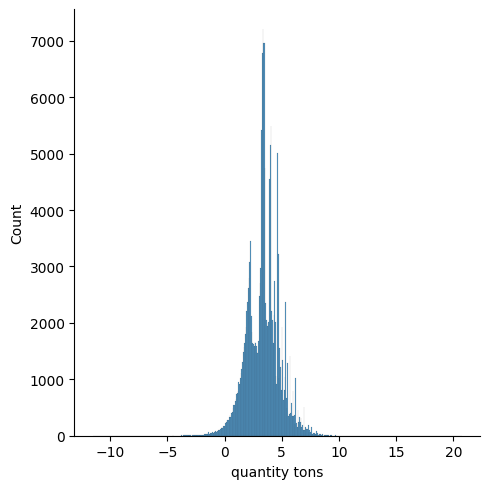

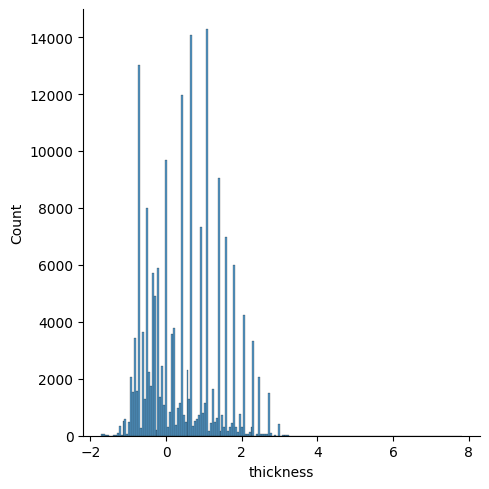

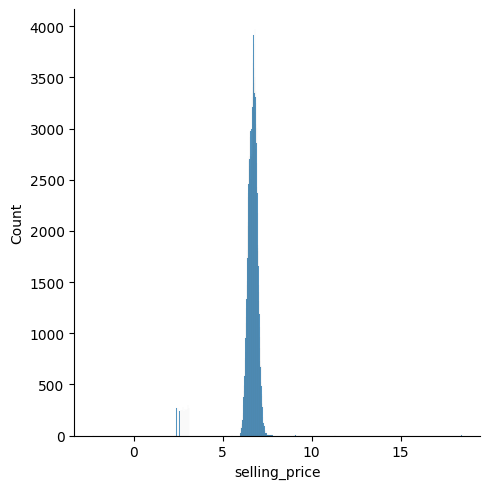

In [8]:
log_col = ["quantity tons","thickness","selling_price"]
for col in log_col:
    data[col] = np.log(data[col])
    sns.displot(data[col])
    plt.show()

In [9]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder

In [10]:
x = data[["quantity tons","customer","country","application","thickness","width","product_ref"]]
y = data[['selling_price']]

In [11]:
ohe = OneHotEncoder(handle_unknown="ignore")
ohe.fit(data[['status']])
status = ohe.fit_transform(data[['status']]).toarray()

In [12]:
ohe1 = OneHotEncoder(handle_unknown="ignore")
ohe1.fit(data[['item type']])
item_type = ohe1.fit_transform(data[['item type']]).toarray()

In [13]:
x = np.concatenate((x[["quantity tons","customer","country","application","thickness","width","product_ref"]].values,status,item_type),axis=1)

In [14]:
scale = StandardScaler()
x = scale.fit_transform(x)

In [15]:
y['selling_price'] = y['selling_price'].replace(y['selling_price'].min(),y['selling_price'].median())

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1,random_state=42)

In [17]:
ytrain = ytrain.fillna(y['selling_price'].median())
ytest = ytest.fillna(y['selling_price'].median())

In [18]:
dtr = DecisionTreeRegressor(criterion='friedman_mse',max_depth=21,min_samples_leaf=4,min_samples_split=10)
model = dtr.fit(xtrain,ytrain)

In [19]:
pred = model.predict(xtest)

In [20]:
print(r2_score(ytest,pred))

0.9110573940348451


In [22]:
from joblib import dump

In [25]:
dump(model,"copperRegressorModel.joblib")

['copperRegressorModel.joblib']

In [32]:
dump(ohe,"statusOHE.joblib")



['statusOHE.joblib']

In [31]:
dump(ohe1,"itemtypeOHE.joblib")

['itemtypeOHE.joblib']

In [33]:
dump(scale,"stdscaler.joblib")

['stdscaler.joblib']

In [29]:
ohe.transform([['Won']]).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [30]:
ohe1.transform([['W']]).toarray()

array([[0., 0., 0., 0., 0., 1., 0.]])